# Project 2

### Betsy Rosalen and Mikhail Groysman

## Project Overview

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Monday 10/14. .

## 1. Choosing the data

We have decide to build on __flight data from [OpenFlights.org](https://openflights.org/data.html)__ from our first project.

We already have __Routes__ sets loaded. We will use __Airplanes__ as our second node.



## Loading the data

First import necessary packages for plotting graphs using NetworkX and Matplotlib and set up graph size parameters...

In [198]:
import networkx as nx
from networkx.algorithms import bipartite as bi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)

Read in __Routes__ data to a Pandas dataframe.

In [172]:
routes_raw = pd.read_csv("Project1_Data/routes.dat", 
                       header=None, sep=",", 
                       usecols=[2, 4], 
                       names=['Airline', 'Airport'])

#routes_raw1=routes_raw.drop_duplicates(subset=['Airline', 'Airport'],keep=False) 
routes_raw=routes_raw.dropna()

routes_raw=routes_raw[routes_raw.Airport!="\\N"]

In [173]:
routes_raw.head()

,Airline,Airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [174]:
aa = routes_raw.copy()

In [175]:
#df['sum_A'] = df.groupby('B')['A'].transform('sum')

In [176]:
aa['weight'] = aa.groupby('Airline')['Airport'].transform('count')#.reset_index()

In [177]:
aa.head(10)

,Airline,Airport,weight
0,AER,KZN,26
1,ASF,KZN,8
2,ASF,MRV,8
3,CEK,KZN,20
4,CEK,OVB,20
5,DME,KZN,324
6,DME,NBC,324
7,DME,TGK,324
8,DME,UUA,324
9,EGO,KGD,11


In [178]:
aa['Airline'] = 'Airline_' + aa.Airline.map(str)
aa['Airport'] = 'Airport_' + aa.Airport.map(str)

In [179]:
aa.head(10)

,Airline,Airport,weight
0,Airline_AER,Airport_KZN,26
1,Airline_ASF,Airport_KZN,8
2,Airline_ASF,Airport_MRV,8
3,Airline_CEK,Airport_KZN,20
4,Airline_CEK,Airport_OVB,20
5,Airline_DME,Airport_KZN,324
6,Airline_DME,Airport_NBC,324
7,Airline_DME,Airport_TGK,324
8,Airline_DME,Airport_UUA,324
9,Airline_EGO,Airport_KGD,11


In [180]:
len(aa)

67663

In [181]:
airports_raw = pd.read_csv("Project1_Data/airports.dat", 
                       header=None, sep=",", 
                       usecols=[0,1, 2, 3, 4, 6, 7], 
                       names=['Airport','Airport Name','City','Country','IATA', 'Latitude', 'Longitude'])
#airports_raw1=airports_raw[airports_raw.Country=='France']

In [182]:
airports_raw.head()

,Airport,Airport Name,City,Country,IATA,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,MAG,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001


In [183]:
len(airports_raw)

7698

In [184]:
airports = airports_raw.copy()

In [185]:
airports['Airport']='Airport_' + airports.IATA.map(str)

In [186]:
aa_merged = pd.merge(aa,airports,left_on='Airport',right_on='Airport',how='inner')

In [187]:
aa_merged.head(20)

,Airline,Airport,weight,Airport Name,City,Country,IATA,Latitude,Longitude
0,Airline_AER,Airport_KZN,26,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
1,Airline_ASF,Airport_KZN,8,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
2,Airline_CEK,Airport_KZN,20,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
3,Airline_DME,Airport_KZN,324,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
4,Airline_EGO,Airport_KZN,11,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
5,Airline_LED,Airport_KZN,184,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
6,Airline_SVX,Airport_KZN,98,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
7,Airline_AYT,Airport_KZN,127,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
8,Airline_LED,Airport_KZN,184,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
9,Airline_DWC,Airport_KZN,48,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702


In [194]:
airport_nodes = aa_merged[['Airport','Airport Name','City','Country','IATA','Latitude','Longitude']].drop_duplicates()

In [195]:
airport_nodes.head()

,Airport,Airport Name,City,Country,IATA,Latitude,Longitude
0,Airport_KZN,Kazan International Airport,Kazan,Russia,KZN,55.606201,49.278702
28,Airport_MRV,Mineralnyye Vody Airport,Mineralnye Vody,Russia,MRV,44.225101,43.081902
50,Airport_OVB,Tolmachevo Airport,Novosibirsk,Russia,OVB,55.012600,82.650703
140,Airport_NBC,Begishevo Airport,Nizhnekamsk,Russia,NBC,55.564701,52.092499
147,Airport_TGK,Taganrog Yuzhny Airport,Taganrog,Russia,TGK,47.198333,38.849167


## Create NetworkX Graph Object

...

In [204]:
B = nx.Graph()
B.add_nodes_from(aa_merged['Airline'], bipartite=0)
B.add_nodes_from(aa_merged['Airport'], bipartite=1)
B.add_weighted_edges_from([tuple(d) for d in aa_merged[['Airline','Airport','weight']].values])

nx.set_node_attributes(B, airport_nodes.set_index('Airport').to_dict('index'))

Let's double check if our attributes were saved in the graph data.

In [214]:
list(B.nodes(data=True))[:3]

[('Airline_AER', {'bipartite': 0}),
 ('Airline_ASF', {'bipartite': 0}),
 ('Airline_CEK', {'bipartite': 0})]

In [216]:
list(B.nodes(data=True))[-2:]

[('Airport_OAG',
  {'bipartite': 1,
   'Airport Name': 'Orange Airport',
   'City': 'Orange',
   'Country': 'Australia',
   'IATA': 'OAG',
   'Latitude': -33.3816986084,
   'Longitude': 149.132995605}),
 ('Airport_GFN',
  {'bipartite': 1,
   'Airport Name': 'Grafton Airport',
   'City': 'Grafton',
   'Country': 'Australia',
   'IATA': 'GFN',
   'Latitude': -29.7593994140625,
   'Longitude': 153.02999877929688})]

In [206]:
B.get_edge_data('Airline_AER','Airport_KZN')

{'weight': 26}

In [217]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 6622
Number of edges: 37271
Average degree:  11.2567


In [220]:
airline_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
airport_nodes = set(B) - airline_nodes

In [221]:
nx.is_connected(B)

False

In [222]:
bi.is_bipartite(B)

True

In [223]:
print(bi.density(B, airline_nodes))

0.0034007674560669952


In [224]:
print(bi.density(B, airport_nodes))

0.0034007674560669952


### Airports

In [226]:
# compute an affiliation network of the Airports
airports = bi.weighted_projected_graph(B, airport_nodes)

# Find the largest connected subgraph in the network
#users_subgraph = nx.connected_component_subgraphs(users)[0]  # textbook code doesn't work
airports_subgraph = max(nx.connected_component_subgraphs(airports), key=len)  # alternate method

airports_subgraph.name = "Airports"

print(nx.info(airports_subgraph))

Name: Airports
Type: Graph
Number of nodes: 3196
Number of edges: 326730
Average degree: 204.4618


In [227]:
nx.is_connected(airports_subgraph)

True

In [230]:
bi.is_bipartite(airports_subgraph)

False

In [233]:
'''
# textbook function doesn't work...
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, edata)
    return g2
'''
def trim_edges(g, weight=1): 
    g2=nx.Graph()  
    my_list=[]
    my_list1=[]
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            my_list.append(f)
            my_list1.append(to)
            g2.add_edge(f,to,attr_dict={weight:edata['weight']})
    g2.add_nodes_from(my_list, bipartite=0)
    g2.add_nodes_from(my_list1, bipartite=1)
    return g2

def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [235]:
islands=island_method(airports_subgraph)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 2200 19
32 240 2
63 91 2
94 37 3
125 10 2
156 3 1


In [218]:
X, Y = bi.sets(B)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [167]:
B.edges(data=True)

EdgeDataView([('Airline_AER', 'Airport_KZN', {'weight': 26}), ('Airline_AER', 'Airport_DME', {'weight': 26}), ('Airline_AER', 'Airport_LED', {'weight': 26}), ('Airline_AER', 'Airport_SVX', {'weight': 26}), ('Airline_AER', 'Airport_VKO', {'weight': 26}), ('Airline_AER', 'Airport_SVO', {'weight': 26}), ('Airline_AER', 'Airport_KRR', {'weight': 26}), ('Airline_AER', 'Airport_KJA', {'weight': 26}), ('Airline_AER', 'Airport_EVN', {'weight': 26}), ('Airline_AER', 'Airport_DYU', {'weight': 26}), ('Airline_AER', 'Airport_LBD', {'weight': 26}), ('Airline_AER', 'Airport_IST', {'weight': 26}), ('Airline_AER', 'Airport_TZX', {'weight': 26}), ('Airline_AER', 'Airport_KIV', {'weight': 26}), ('Airline_AER', 'Airport_MSQ', {'weight': 26}), ('Airline_AER', 'Airport_TAS', {'weight': 26}), ('Airline_AER', 'Airport_OMS', {'weight': 26}), ('Airline_ASF', 'Airport_KZN', {'weight': 8}), ('Airline_ASF', 'Airport_MRV', {'weight': 8}), ('Airline_ASF', 'Airport_DME', {'weight': 8}), ('Airline_ASF', 'Airport_LED'

In [253]:
graphs = list(nx.connected_component_subgraphs(B))

In [134]:
women = B.graph[bipartite=0]

SyntaxError: invalid syntax (<ipython-input-134-580a541ecc07>, line 1)

In [254]:
G0=graphs[0]

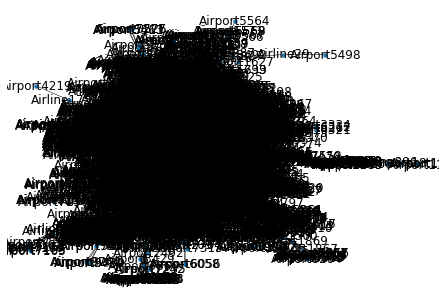

In [255]:
nx.draw(G0, with_labels=True, node_size=20, line_color= 'grey', linewidths= 0, width= 0.5)    

In [251]:
BL = max(nx.connected_component_subgraphs(B), key=len)

In [112]:
from networkx.algorithms import bipartite

In [252]:
bipartite.is_bipartite(BL)

True

In [114]:
Airlines_nodes, Airports_nodes = bipartite.sets(BL)

NetworkXError: Graph is not bipartite.

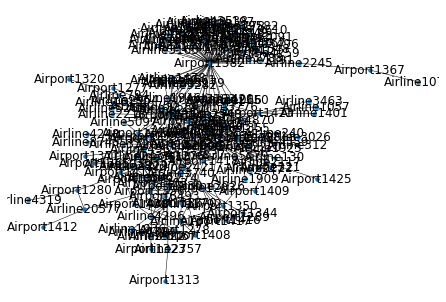

In [191]:
nx.draw(BL, with_labels=True, node_size=20, line_color= 'grey', linewidths= 0, width= 0.5)

In [108]:
nx.is_connected(BL)

True

In [68]:
# project bipartite graph onto women nodes
Air = bipartite.projected_graph(B, Airlines_nodes)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [66]:
print('')
print("# of Friends, Member")

Air_degrees = {}
for a in Airlines_nodes:
   Air_degrees[a] = Air.degree(a)

for a in sorted(Air_degrees, key=Air_degrees.get, reverse=True):
  print(Air_degrees[a], a)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [376]:
def trim_edges(g, weight=1): 
    g2=nx.Graph()  
    my_list=[]
    my_list1=[]
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            #print(f)
            #print(to)
            #print(edata['weight'])
            #print(weight)
            #a=edata['weight']
            #g2.add_edge(f,to,attr_dict={weight:edata['weight']}) 
            my_list.append(f)
            my_list1.append(to)
            g2.add_edge(f,to,attr_dict={weight:edata['weight']})
    g2.add_nodes_from(my_list, bipartite=0)
    g2.add_nodes_from(my_list1, bipartite=1)
    return g2 

In [313]:
def island_method(g, iterations=5): 
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    #print(weights)
    mn=int(min(weights))   
    #print(mn)
    mx=int(max(weights))    #compute the size of the step, so we get a reasonable step in iterations    
    #print(mx)
    step=int((mx-mn)/iterations)
    #print(step)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)] 

In [227]:
nx.connected_component_subgraphs(B)

<generator object connected_component_subgraphs at 0x0000019CD2F004F8>

In [219]:
len(B)

3037

In [222]:
len(nx.connected_component_subgraphs(B))

TypeError: object of type 'generator' has no len()

In [377]:
island=island_method(B)

In [386]:
G=island[4][1]

In [338]:
graphs = list(nx.connected_component_subgraphs(G))

In [359]:
G

44

In [357]:
G1=graphs[0]

In [369]:
G.node(data=True)


NodeDataView({'A': {'bipartite': 1}, 'i': {'bipartite': 1}, 'r': {'bipartite': 1}, 'l': {'bipartite': 0}, 'n': {'bipartite': 0}, 'e': {'bipartite': 0}, '1': {'bipartite': 1}, '0': {'bipartite': 1}, '6': {'bipartite': 1}, 'p': {'bipartite': 1}, 'o': {'bipartite': 1}, 't': {'bipartite': 1}, '7': {'bipartite': 1}, 'Airline1006': {}, 'Airport1701': {}, '2': {'bipartite': 1}, '9': {'bipartite': 1}, 'Airport2179': {}, '8': {'bipartite': 1}, 'Airport2908': {}, 'Airport2910': {}, 'Airport2912': {}, '4': {'bipartite': 1}, 'Airport2914': {}, 'Airport2917': {}, 'Airport2920': {}, 'Airport2922': {}, '3': {'bipartite': 1}, 'Airport2939': {}, 'Airport2948': {}, 'Airport2983': {}, '5': {'bipartite': 1}, 'Airport2985': {}, 'Airport3364': {}, 'Airport3399': {}, 'Airport4357': {}, 'Airport4358': {}, 'Airport4367': {}, 'Airport507': {}, 'Airport6086': {}, 'Airline1008': {}, 'Airport3156': {}, 'Airline10121': {}, 'Airport3244': {}, 'Airport3282': {}, 'Airport3908': {}, 'Airport3910': {}, 'Airport6212': {}

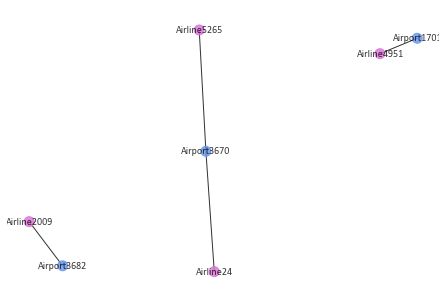

In [387]:
colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('cornflowerblue')         
    else:
        colors.append('orchid')

nx.draw(G, with_labels=True, node_size=100, node_color=colors, font_size=10, font_family="calibri", width=1,
                  edge_color="black", alpha=0.8)